In [ ]:
!git clone https://github.com/ImagingYeditepe/Segmentation-of-Teeth-in-Panoramic-X-ray-Image.git

# These codes doesnt includes augmention tech. for now

Cloning into 'Segmentation-of-Teeth-in-Panoramic-X-ray-Image'...
remote: Enumerating objects: 196, done.
remote: Total 196 (delta 0), reused 0 (delta 0), pack-reused 196
Receiving objects: 100% (196/196), 22.40 MiB | 33.28 MiB/s, done.
Resolving deltas: 100% (91/91), done.


In [ ]:
import sys
sys.path.append("/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image")

In [ ]:
%cd /content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image
#!pip install -qr requirements.txt
#You can  use pip install however colab includes all libraries so we dont need them

/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image


In [ ]:
from download_dataset import *
import os
path = "/content/Data"
if os.path.exists(path+'/DentalPanoramicXrays.zip') == False:
  os.mkdir(path)
  download_dataset(path+'/')

In [ ]:
from images_prepare import *
#pre_images(resize_shape,path,include_zip)
X,X_sizes=pre_images((512,512),path,True)

In [ ]:
from masks_prepare import *
#Y=pre_masks(resize_shape=(512,512),path='/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image/Original_Masks')  ORIGINALL MASKS function 
Y=pre_splitted_masks(path='/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image/Custom_Masks') #Custom Splitted MASKS size 512x512


In [ ]:
X=np.float32(X/255)
Y=np.float32(Y/255)

In [ ]:
x_train=X[:105,:,:,:]
y_train=Y[:105,:,:,:]
x_test=X[105:,:,:,:]
y_test=Y[105:,:,:,:]

In [ ]:
import random
import matplotlib.pyplot as plt
random_number=random.randint(0,104)
print(random_number)

47


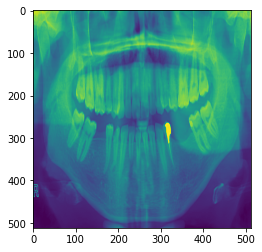

In [ ]:
#Checking data X  and Y matching
plt.imshow(x_train[random_number,:,:,0])

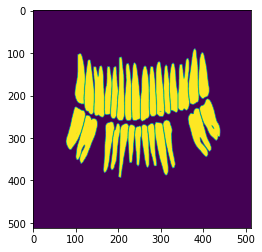

In [ ]:
#Checking data X  and Y matching
plt.imshow(y_train[random_number,:,:,0])

In [ ]:
from model import *
model=UNET(input_shape=(512,512,1),last_activation='sigmoid')
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 512, 512, 32) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 32) 9248        dropout[0][0]                    
______________________________________________________________________________________________

In [ ]:
model.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Your choice batch and epoch 
model.fit(x_train,y_train,batch_size=8,epochs=150,verbose=1)

Epoch 1/150
14/14 [==============================] - 63s 1s/step - loss: 0.5324 - accuracy: 0.6857
Epoch 2/150
14/14 [==============================] - 13s 893ms/step - loss: 0.2684 - accuracy: 0.8332
Epoch 3/150
14/14 [==============================] - 13s 908ms/step - loss: 0.2057 - accuracy: 0.8592
Epoch 4/150
14/14 [==============================] - 13s 913ms/step - loss: 0.1763 - accuracy: 0.8694
Epoch 5/150
14/14 [==============================] - 13s 922ms/step - loss: 0.1624 - accuracy: 0.8756
Epoch 6/150
14/14 [==============================] - 13s 931ms/step - loss: 0.1508 - accuracy: 0.8795
Epoch 7/150
14/14 [==============================] - 13s 940ms/step - loss: 0.1439 - accuracy: 0.8818
Epoch 8/150
14/14 [==============================] - 13s 950ms/step - loss: 0.1353 - accuracy: 0.8891
Epoch 9/150
14/14 [==============================] - 13s 950ms/step - loss: 0.1301 - accuracy: 0.8877
Epoch 10/150
14/14 [==============================] - 13s 954ms/step - loss: 0.1240 -

In [ ]:
predict_img=model.predict(x_test)
##model.save(path)
predict=predict_img[1,:,:,0] 

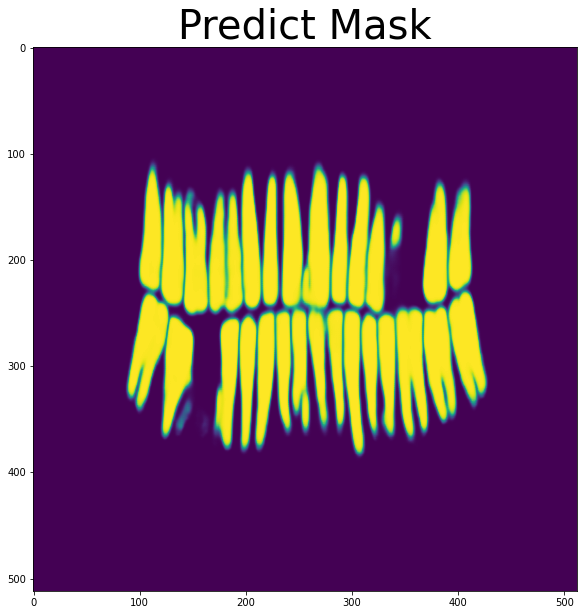

In [ ]:

plt.figure(figsize = (20,10))
plt.title("Predict Mask",fontsize = 40)
plt.imshow(predict)
#For CCA, we saved
plt.imsave("/content/predict.png",predict)

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
from CCA_Analysis import *


##Plotting - RESULT Example
img=cv2.imread("/content/drive/Images/107.png")#original img 107.png 

predict1 = cv2.resize(predict, (img.shape[1],img.shape[0]), interpolation=cv2.INTER_LANCZOS4)

mask=np.uint8(predict1*255)# 
_, mask = cv2.threshold(mask, thresh=255/2, maxval=255, type=cv2.THRESH_BINARY)
cnts,hieararch=cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(img[:,:,0], cnts, -1, (255, 0, 0) , 2)
img = cv2.UMat.get(img)
cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
from CCA_Analysis import *


##Plotting - RESULT Example with CCA_Analysis
img=cv2.imread("/content/Data/Images/107.png")#original img 107.png 

#load image (mask was saved by matplotlib.pyplot) 
predicted=cv2.imread("/content/predict.png")

predicted = cv2.resize(predicted, (img.shape[1],img.shape[0]), interpolation=cv2.INTER_LANCZOS4)

cca_result,teeth_count=CCA_Analysis(img,predicted,3,2)
cv2_imshow(cca_result)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(teeth_count,"Teeth Count")

26 Teeth Count
